# Convolution Neural Networks : Application
- Building a ConvNet to identify sign language digits using the TF keras Functional API

# Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, Model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the Data

In [2]:
def load_data():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    num_class = len(np.unique(y_train))
    return X_train, y_train, X_test, y_test, num_class

In [3]:
# Loading the data
X_train, y_train, X_test, y_test, num_classes = load_data()

In [4]:
print("X_train Shape :", X_train.shape)
print("y_train Shape :", y_train.shape)
print("X_test Shape :", X_test.shape)
print("y_test Shape :", y_test.shape)
print("No of Classes :", num_classes)

X_train Shape : (60000, 28, 28)
y_train Shape : (60000,)
X_test Shape : (10000, 28, 28)
y_test Shape : (10000,)
No of Classes : 10


Digit =  1


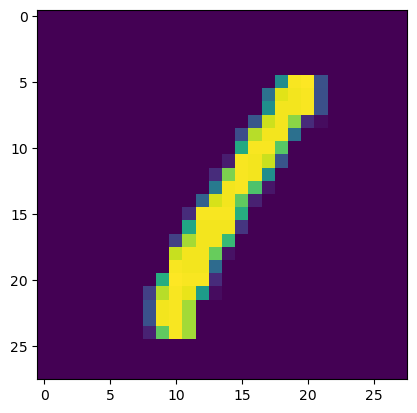

In [16]:
# Example of image from the dataset
index = 3
print('Digit = ', y_train[index])
plt.imshow(X_train[index])
plt.show()

# Normalization

In [6]:
# Normalize pixel values to [0, 1]
def normalize(X):
    return X / 255.0

# On-Hot Encoding

In [7]:
# Converting to one hot encoding
def convert_to_one_hot(Y, C):
    return tf.keras.utils.to_categorical(Y, C)

In [8]:
# Normalize the X values
X_train = normalize(X_train)
X_test = normalize(X_test)

# Convert labels to one-hot encoding
y_train = convert_to_one_hot(y_train, num_classes)
y_test = convert_to_one_hot(y_test, num_classes)

In [9]:
print("X_train Shape :", X_train.shape)
print("y_train Shape :", X_test.shape)
print("X_test Shape :", y_train.shape)
print("y_test Shape :", y_test.shape)

X_train Shape : (60000, 28, 28)
y_train Shape : (10000, 28, 28)
X_test Shape : (60000, 10)
y_test Shape : (10000, 10)


In [10]:
# Reshape X data to include channel dimension for CONV
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [11]:
print("X_train Shape :", X_train.shape)
print("y_train Shape :", X_test.shape)
print("X_test Shape :", y_train.shape)
print("y_test Shape :", y_test.shape)

X_train Shape : (60000, 28, 28, 1)
y_train Shape : (10000, 28, 28, 1)
X_test Shape : (60000, 10)
y_test Shape : (10000, 10)


# Convlutional model
- Implementing the convolutional model function to built the following model :
  - CONV2D -> BATCH NORM -> CONV2D -> BATCH NORM -> MAX POOL -> DROPOUT -> FLATTEN -> DENSE -> BATCH NORM -> DROPOUT -> DENSE

In [12]:
# Convoluional model
def build_model():
    model = tf.keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
# Initialize and train model
model = build_model()

C:\Users\surya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 10, 10, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 505,098 (1.93 MB)

 Trainable params: 504,394 (1.92 MB)

 Non-trainable params: 704 (2.75 KB)

In [15]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train the model

In [16]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test),
                   batch_size=64, callbacks=[early_stopping, reduce_lr])

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 106s 110ms/step - accuracy: 0.8986 - loss: 0.3367 - val_accuracy: 0.9864 - val_loss: 0.0426 - learning_rate: 0.0010
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 96s 103ms/step - accuracy: 0.9791 - loss: 0.0679 - val_accuracy: 0.9890 - val_loss: 0.0329 - learning_rate: 0.0010
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 95s 102ms/step - accuracy: 0.9854 - loss: 0.0478 - val_accuracy: 0.9912 - val_loss: 0.0286 - learning_rate: 0.0010
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 96s 102ms/step - accuracy: 0.9868 - loss: 0.0409 - val_accuracy: 0.9902 - val_loss: 0.0299 - learning_rate: 0.0010
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 97s 104ms/step - accuracy: 0.9879 - loss: 0.0363 - val_accuracy: 0.9892 - val_loss: 0.0352 - learning_rate: 0.0010
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 96s 102ms/step - accuracy: 0.9895 - loss: 0.0344 - val_accuracy: 0.9927 - val_loss: 0.0237 - learning_rate: 0.0010
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 97s 103ms/step - accuracy: 0.

In [17]:
# Evalue Model
y_pred = model.predict(X_test).argmax(axis=1)
# Convert one-hot back to labels
y_true = y_test.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


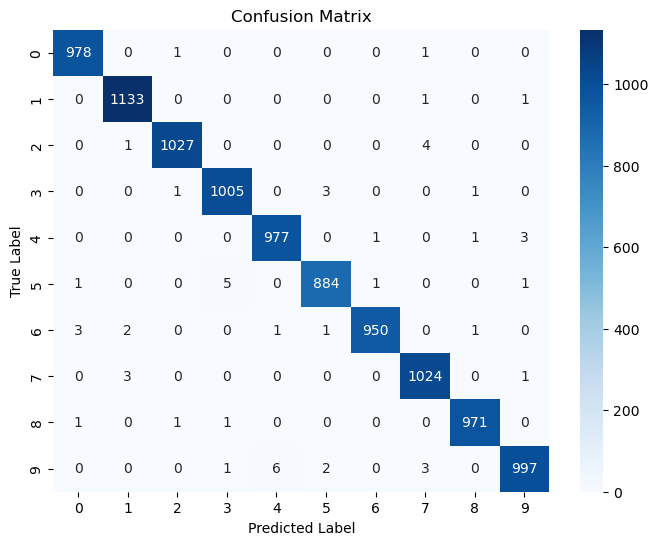

In [18]:
# Confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [19]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       1.00      1.00      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [21]:
model.save('my_model.keras')